<img src="ku_logo_uk_v.png" alt="drawing" width="500" style="float:right"/>


# Welcome to Workshop 8 - Introduction to Programming and Numerical Analysis !!!

# Today
- API's
- Pandas Merges
- Split-Apply-Combine

# Statistics Denmark API

## Read the docs
https://pydst.readthedocs.io/en/latest/pydst.html

In [1]:
#%pip install git+https://github.com/elben10/pydst
#pip install pydst



In [3]:
import pydst
dst = pydst.Dst(lang='en') # import statistics denmarks api
tab = 'INDKP101' # some income table
variables  = dst.get_variables(table_id = tab) # investigate the options
variables.id.values



array(['OMRÅDE', 'ENHED', 'KOEN', 'INDKOMSTTYPE', 'Tid'], dtype=object)

In [5]:
selected_vars = {'ENHED':['*'], 
                 'KOEN':['*'],
                 'Tid':['*']} # select some stuff



In [6]:
df = dst.get_data(table_id=tab, 
                   variables=selected_vars) # get the data
df.sample(10) 



,ENHED,KOEN,TID,OMRÅDE,INDKOMSTTYPE,INDHOLD
349,People with type of income (number),Men,2016,All Denmark,1 Disposable income (2+30-31-32-35),2313898
195,Amount of income (DKK 1.000),Women,2003,All Denmark,1 Disposable income (2+30-31-32-35),302419166
46,Average income for people with type of income ...,Men,1990,All Denmark,1 Disposable income (2+30-31-32-35),101365
199,Average income for all people (DKK),Men,2003,All Denmark,1 Disposable income (2+30-31-32-35),166246
166,Average income for people with type of income ...,Men,2000,All Denmark,1 Disposable income (2+30-31-32-35),153734
73,People with type of income (number),Men,1993,All Denmark,1 Disposable income (2+30-31-32-35),2079010
206,People with type of income (number),"Men and women, total",2004,All Denmark,1 Disposable income (2+30-31-32-35),4328959
1,People with type of income (number),Men,1987,All Denmark,1 Disposable income (2+30-31-32-35),2038941
245,Amount of income (DKK 1.000),"Men and women, total",2007,All Denmark,1 Disposable income (2+30-31-32-35),783448533
202,Average income for people with type of income ...,Men,2003,All Denmark,1 Disposable income (2+30-31-32-35),167149


In [7]:
df.ENHED.value_counts() # investigate income types



People with type of income (number)                    105
Amount of income (DKK 1.000)                           105
Average income for all people (DKK)                    105
Average income for people with type of income (DKK)    105
Name: ENHED, dtype: int64

In [8]:
df = df[df.ENHED == 'Average income for all people (DKK)'] # subset the dataset
df.sample(5)



,ENHED,KOEN,TID,OMRÅDE,INDKOMSTTYPE,INDHOLD
282,Average income for all people (DKK),Women,2010,All Denmark,1 Disposable income (2+30-31-32-35),179725
366,Average income for all people (DKK),Women,2017,All Denmark,1 Disposable income (2+30-31-32-35),207324
114,Average income for all people (DKK),Women,1996,All Denmark,1 Disposable income (2+30-31-32-35),104161
92,Average income for all people (DKK),"Men and women, total",1994,All Denmark,1 Disposable income (2+30-31-32-35),107810
140,Average income for all people (DKK),"Men and women, total",1998,All Denmark,1 Disposable income (2+30-31-32-35),127671


In [9]:
tab2 = 'PRIS112' # yet another table, this time with inflation
variables2  = dst.get_variables(table_id = tab2) # investigate the content
variables2.id.values



array(['HOVED', 'Tid'], dtype=object)

In [10]:
selected_vars2 = {'HOVED':['*'], 
                 'Tid':['*']} # select stuff



In [11]:
df2 = dst.get_data(table_id=tab2, 
                   variables=selected_vars2) # get the data
df2.sample(10)



,HOVED,TID,INDHOLD
14,"Average, yearly",1987,54.9
65,Annual increase,2012,2.4
31,Annual increase,1995,2.1
45,Annual increase,2002,2.4
20,"Average, yearly",1990,61.7
72,"Average, yearly",2016,100.3
28,"Average, yearly",1994,66.6
41,Annual increase,2000,2.9
26,"Average, yearly",1993,65.3
5,Annual increase,1982,10.1


In [12]:
df2 = df2[df2.HOVED == 'Average, yearly'] # subset the data
df2.tail()



,HOVED,TID,INDHOLD
76,"Average, yearly",2018,102.2
78,"Average, yearly",2019,103.0
80,"Average, yearly",2020,103.4
82,"Average, yearly",2021,105.4
84,"Average, yearly",2022,113.5


# Merging two data sets

## Your new favorite website
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [13]:
import pandas as pd



In [14]:
result = pd.merge(df, df2, how="left", on=["TID"]) # can be left, right, outer, inner etc.
result.head(10)


,ENHED,KOEN,TID,OMRÅDE,INDKOMSTTYPE,INDHOLD_x,HOVED,INDHOLD_y
0,Average income for all people (DKK),Women,1987,All Denmark,1 Disposable income (2+30-31-32-35),67614,"Average, yearly",54.9
1,Average income for all people (DKK),Men,1987,All Denmark,1 Disposable income (2+30-31-32-35),89143,"Average, yearly",54.9
2,Average income for all people (DKK),"Men and women, total",1987,All Denmark,1 Disposable income (2+30-31-32-35),78135,"Average, yearly",54.9
3,Average income for all people (DKK),Women,1988,All Denmark,1 Disposable income (2+30-31-32-35),72330,"Average, yearly",57.4
4,Average income for all people (DKK),Men,1988,All Denmark,1 Disposable income (2+30-31-32-35),92738,"Average, yearly",57.4
5,Average income for all people (DKK),"Men and women, total",1988,All Denmark,1 Disposable income (2+30-31-32-35),82304,"Average, yearly",57.4
6,Average income for all people (DKK),Women,1989,All Denmark,1 Disposable income (2+30-31-32-35),77035,"Average, yearly",60.1
7,Average income for all people (DKK),Men,1989,All Denmark,1 Disposable income (2+30-31-32-35),97448,"Average, yearly",60.1
8,Average income for all people (DKK),"Men and women, total",1989,All Denmark,1 Disposable income (2+30-31-32-35),87011,"Average, yearly",60.1
9,Average income for all people (DKK),Women,1990,All Denmark,1 Disposable income (2+30-31-32-35),80440,"Average, yearly",61.7


# Split-Apply-Combine

In [17]:
# a. split
res_grouped = result.groupby(['KOEN', 'TID']) # group by gender and year



In [18]:
# b. apply
res_app = res_grouped.apply(lambda x: ( x['INDHOLD_x'] / x['INDHOLD_y']).sum()) # divide income w. inflation

res_app

KOEN   TID 
Men    1987    1623.734062
       1988    1615.644599
       1989    1621.430948
       1990    1635.105348
       1991    1670.490506
                  ...     
Women  2017    2044.615385
       2018    2082.984344
       2019    2129.650485
       2020    2219.603482
       2021    2269.914611
Length: 105, dtype: float64

In [21]:

# c. combine
result = res_app.unstack() # unstack the tables
result


TID,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
KOEN,,,,,,,,,,,,,,,,,,,,,
Men,1623.734062,1615.644599,1621.430948,1635.105348,1670.490506,1678.976744,1710.566616,1804.174174,1852.970588,1885.812950,...,2260.845214,2313.292929,2340.682731,2408.36,2441.854437,2495.216963,2527.641879,2602.922330,2708.442940,2810.113852
"Men and women, total",1423.224044,1433.867596,1447.770383,1465.688817,1497.357595,1513.271318,1543.491577,1618.768769,1659.705882,1688.244604,...,2077.769857,2117.727273,2148.684739,2201.85,2227.696909,2267.011834,2302.465753,2363.223301,2460.880077,2536.593928
Women,1231.584699,1260.104530,1281.780366,1303.727715,1331.677215,1354.604651,1383.384380,1441.051051,1474.382353,1498.719424,...,1900.560081,1928.151515,1962.459839,2001.19,2019.182453,2044.615385,2082.984344,2129.650485,2219.603482,2269.914611


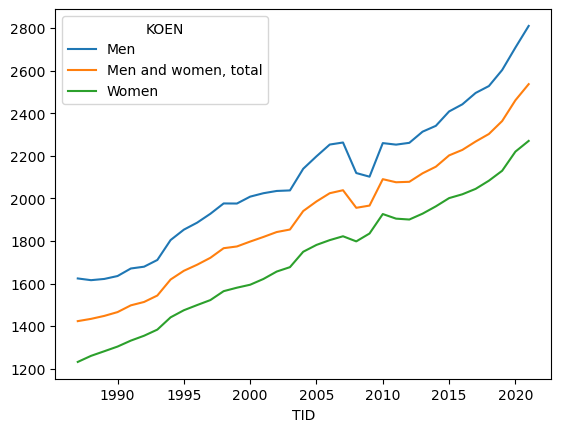

In [22]:
result.T.plot(); #  transpose and plot



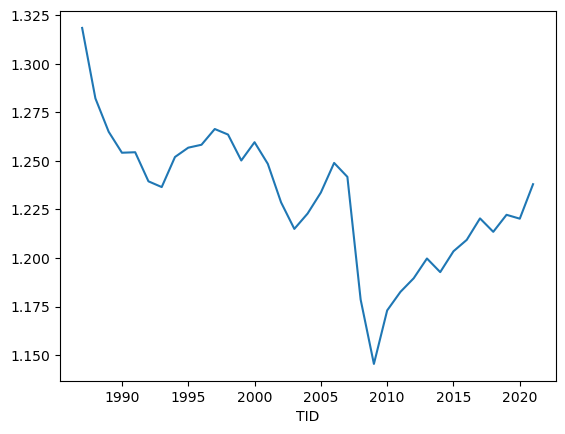

In [23]:
se = result.iloc[0]/result.iloc[-1]
se.T.plot();

# Time for Problem set 4